In [ ]:
#Data: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset

# Business Problem
The business struggles to effectively engage and retain a diverse customer base due to limited insights into customer purchasing behaviors. 
Without targeted marketing strategies, and personalized customer experiences, missing revenue opportunities.

Objective
The goal is to perform a segmentation analysis to identify distinct customer groups within the business’s customer base. 
By understanding each segment’s purchasing patterns, the business can:
    Develop targeted marketing and engagement strategies for each customer type.
    This analysis will help drive revenue growth, and build lasting customer relationships.

In [70]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib
matplotlib.use('Agg')  # Use the Agg backend for rendering without a GUI
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")

# Generate a profile report
profile = ProfileReport(df, title="Customer Segmentation Dataset Report", explorative=True)

# Save the profile report to an HTML file
profile.to_file("data_profile_report.html")
print("Report saved as data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [2]:
# Size of sales_df

# Write a function to have this output pretty, 
# All basic information can be found with the data.info() function. Also look at pandas_profiling
data_size = sales_df.shape
print(f"Number of rows: {data_size[0]}")
print(f"Number of columns: {data_size[1]}")

NameError: name 'sales_df' is not defined

In [8]:
#Main Varialbles
Main_Variables = sales_df.columns
print("Main Variables:")
print(Main_Variables)

Main Variables:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [10]:
# Data Types for sales_df
data_types = sales_df.dtypes
print("Data types of each column")
print(data_types)

Data types of each column
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [12]:
# Handling Missing Data, Outliers, and unwanted chunks of data

# Drop unnecessary columns
sales_df.drop(['Description', 'InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'], 
              axis=1, 
              inplace=True)

# Display dataframe info
print("Dataset information after dropping columns:")
sales_df.info()

# Filter out negative values
sales_df = sales_df[sales_df['Quantity'] > 0]
sales_df = sales_df[sales_df['UnitPrice'] > 0]

# Remove outliers using IQR method
# For Quantity
Q1_quantity = sales_df['Quantity'].quantile(0.25)
Q3_quantity = sales_df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

sales_df = sales_df[
    (sales_df['Quantity'] >= (Q1_quantity - 1.5 * IQR_quantity)) & 
    (sales_df['Quantity'] <= (Q3_quantity + 1.5 * IQR_quantity))
]

# Generate summary statistics
print("\nSummary statistics after cleaning:")
print(sales_df.describe())

# Print shape of cleaned dataset
print(f"\nFinal dataset shape: {sales_df.shape}")

Dataset information after dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   541909 non-null  int64  
 1   UnitPrice  541909 non-null  float64
 2   Country    541909 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 12.4+ MB

Summary statistics after cleaning:
            Quantity      UnitPrice
count  473741.000000  473741.000000
mean        4.716636       4.216455
std         4.441115      37.965381
min         1.000000       0.001000
25%         1.000000       1.250000
50%         3.000000       2.460000
75%         6.000000       4.150000
max        23.000000   13541.330000

Final dataset shape: (473741, 3)


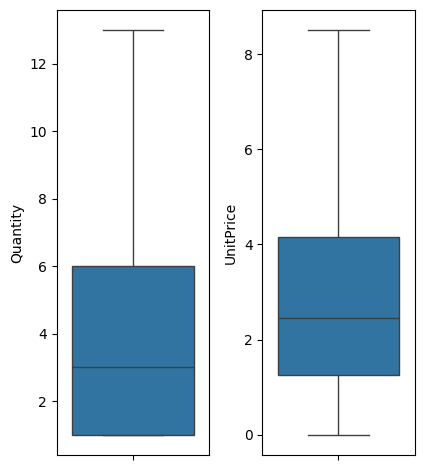

In [26]:
# Use swarm plots
plt.subplot(1, 3, 1)
sns.boxplot(y='Quantity', data=sales_df, showfliers=False)

plt.subplot(1, 3, 2)
sns.boxplot(y='UnitPrice', data=sales_df, showfliers=False)

plt.tight_layout()


In [28]:
# Calculate TotalPrice column
sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']

# Print first few rows to verify calculation
print("\nFirst few rows with TotalPrice:")
print(sales_df[['Quantity', 'UnitPrice', 'TotalPrice']].head())

# Print summary statistics of TotalPrice
print("\nTotalPrice Summary Statistics:")
print(sales_df['TotalPrice'].describe())


First few rows with TotalPrice:
   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34

TotalPrice Summary Statistics:
count    473741.000000
mean         12.760273
std          40.483825
min           0.001000
25%           3.300000
50%           8.280000
75%          16.500000
max       13541.330000
Name: TotalPrice, dtype: float64


In [30]:
# Average order value by country
avg_order = sales_df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
print("Average order value by country:")
print(avg_order)

Average order value by country:
Country
Singapore               124.604892
Hong Kong                55.454545
Lithuania                42.795833
Lebanon                  38.197273
Czech Republic           35.757143
Netherlands              33.124833
Greece                   31.610769
Brazil                   29.110000
Denmark                  28.878855
United Arab Emirates     28.177407
Norway                   28.157513
Finland                  27.411386
Sweden                   26.051562
Australia                25.405000
Malta                    24.458824
Austria                  23.136581
Bahrain                  23.100000
Switzerland              23.013628
Channel Islands          23.004074
EIRE                     22.674142
Italy                    22.268260
European Community       21.723148
Germany                  21.570657
Canada                   21.379298
Israel                   21.154078
Iceland                  21.073605
France                   20.847349
Portugal       


Significant sales by country:
Country
United Kingdom    5265439.364
Germany            161909.350
France             145618.730
EIRE               140647.700
Spain               39313.810
Belgium             34763.680
Switzerland         34129.210
Portugal            27211.420
Norway              21287.080
Netherlands         20835.520
Name: TotalPrice, dtype: float64


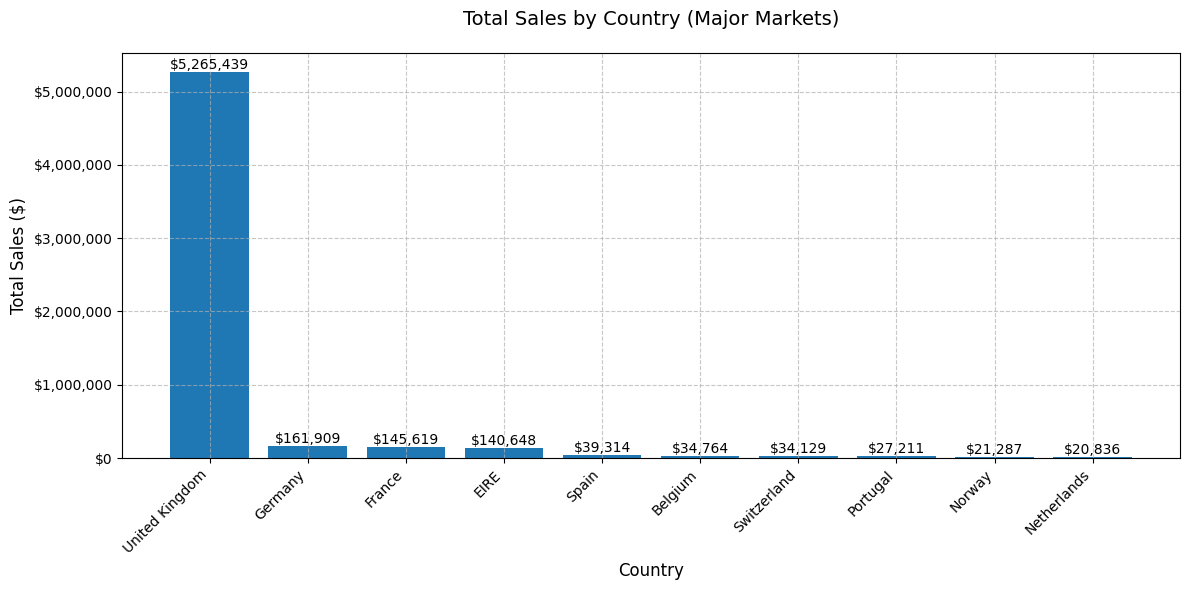

In [32]:
# Group by Country and calculate total sales
country_sales = sales_df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Filter for countries with significant sales (e.g., top 10 or above threshold)
significant_sales = country_sales[country_sales > 20000]  # Adjust threshold as needed

# Print filtered sales by country
print("\nSignificant sales by country:")
print(significant_sales)

# Plot significant sales by country
plt.figure(figsize=(12, 6))
plt.bar(significant_sales.index, significant_sales.values)

# Format axes and labels
plt.title('Total Sales by Country (Major Markets)', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, (country, sales) in enumerate(significant_sales.items()):
    plt.text(i, sales, f'${sales:,.0f}', 
             ha='center', va='bottom')

# Add grid and adjust layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show plot
plt.savefig('significant_sales_by_country.png', bbox_inches='tight', dpi=300)
plt.show()

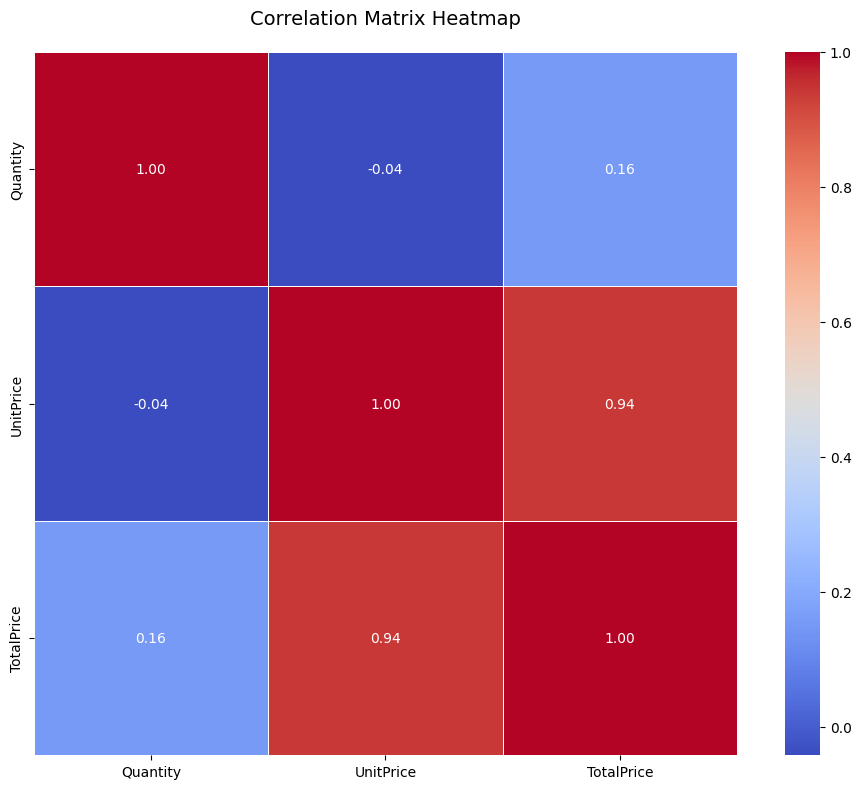

In [34]:
# Calculate correlation matrix for numeric columns
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
correlation_matrix = sales_df[numeric_cols].corr()

# Visualize the Correlation Matrix 
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,              # Show values on cells
            cmap='coolwarm',         # Color scheme
            linewidths=0.5,          # Grid line width
            fmt='.2f',              # Format numbers to 2 decimal places
            square=True)            # Make cells square

# Format title and layout
plt.title('Correlation Matrix Heatmap', fontsize=14, pad=20)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save and show plot
plt.savefig('correlation_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

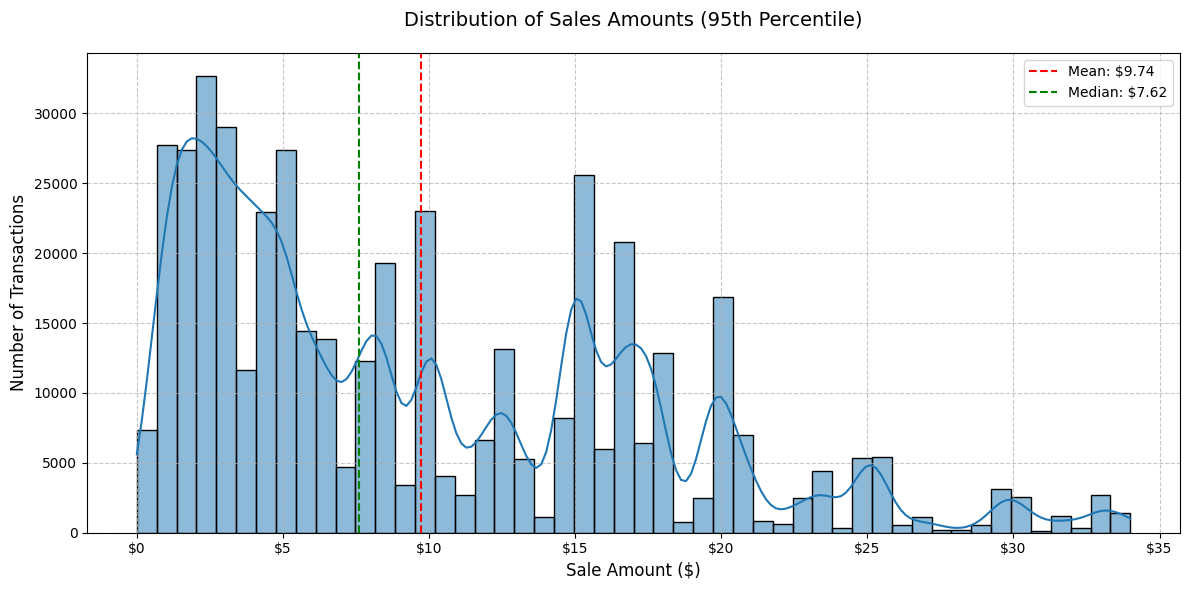


Filtered Sales Statistics (95th Percentile):
count    450252.000000
mean          9.741027
std           7.675443
min           0.001000
25%           3.290000
50%           7.620000
75%          15.000000
max          34.000000
Name: TotalPrice, dtype: float64


In [36]:
# Frequency Analysis of Sales with Better Distribution
plt.figure(figsize=(12, 6))

# Filter for sales below a certain threshold (e.g., 95th percentile)
sales_threshold = sales_df['TotalPrice'].quantile(0.95)  # Adjust as needed
filtered_sales = sales_df[sales_df['TotalPrice'] <= sales_threshold]

# Create histogram with KDE
sns.histplot(data=filtered_sales, x='TotalPrice', bins=50, kde=True)

# Format axes and labels
plt.title('Distribution of Sales Amounts (95th Percentile)', fontsize=14, pad=20)
plt.xlabel('Sale Amount ($)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Format x-axis to show currency
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Calculate and display key statistics for filtered data
mean_sales = filtered_sales['TotalPrice'].mean()
median_sales = filtered_sales['TotalPrice'].median()
plt.axvline(mean_sales, color='red', linestyle='--', label=f'Mean: ${mean_sales:,.2f}')
plt.axvline(median_sales, color='green', linestyle='--', label=f'Median: ${median_sales:,.2f}')

# Add legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show plot
plt.savefig('sales_distribution_filtered.png', bbox_inches='tight', dpi=300)
plt.show()

# Print summary statistics for filtered data
print("\nFiltered Sales Statistics (95th Percentile):")
print(filtered_sales['TotalPrice'].describe())

In [111]:
# Select features for clustering
features = ['Quantity', 'UnitPrice',]
cluster_data = sales_df[features]

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
kmeans = KMeans(n_clusters=3, random_state=42)
sales_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Convert cluster numbers to meaningful labels
sales_df['Cluster_Label'] = sales_df['Cluster'].map({
    0: 'Frequent small spenders',
    1: 'Medium Spenders',
    2: 'Occasional high spenders'
})

# Aggregate by country
country_clusters = sales_df.groupby('Country')['Cluster_Label'].agg(lambda x: x.mode()[0]).reset_index()

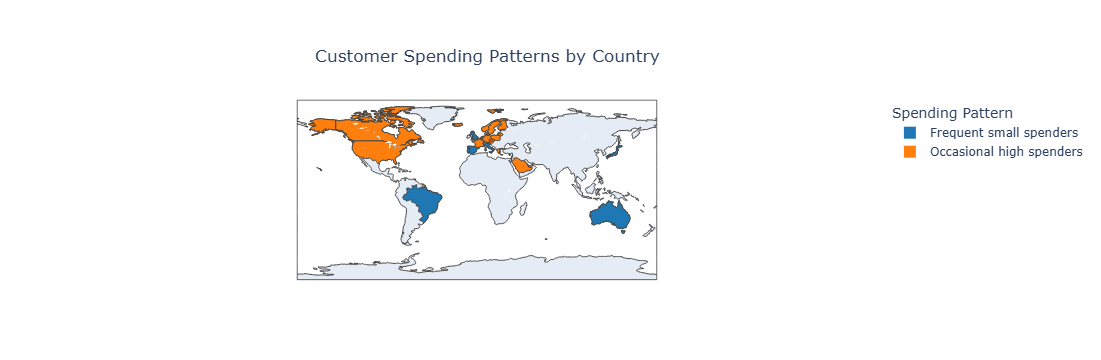


Cluster Characteristics:
                          Quantity  UnitPrice
Cluster_Label                                
Frequent small spenders   0.068041   0.000359
Medium Spenders           0.000000   0.806079
Occasional high spenders  0.489986   0.000139


In [113]:
# see plotlyexpress
# Create choropleth map
fig = px.choropleth(country_clusters,
                    locationmode='country names',
                    locations='Country',
                    title='Customer Spending Patterns by Country',
                    color='Cluster_Label',
                    color_discrete_map={
                        'Frequent small spenders': '#1f77b4',   # Blue
                        'Medium spenders': '#2ca02c',            # Green
                        'Occasional high spenders': '#ff7f0e'  # Orange
                    })

# Update map layout
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text='Spending Pattern',
    legend_title_side='top',
    title_pad_l=260,
    title_y=0.86
)

# Show plot
fig.show()

# Print cluster characteristics
print("\nCluster Characteristics:")
print(sales_df.groupby('Cluster_Label')[features].mean())

# Conclusions
Through clustering analysis, we identified distinct customer segments with unique purchasing behaviors. These include:

Frequent Small Spenders: Customers who make regular, low-cost purchases, often focusing on essential or add-on products.
Occasional High Spenders: Customers who buy less frequently but tend to make significant purchases, often in bulk or for high-value items.
This segmentation provides a deeper understanding of our customer base and lays the foundation for developing tailored strategies to engage each group effectively.

Opportunities for Targeted Marketing:
Each segment presents specific opportunities for targeted marketing that could drive engagement and brand loyalty:

Frequent Small Spenders can be engaged through loyalty programs, incentives on frequently bought items, and subscription options that simplify regular purchases.
Occasional High Spenders could be targeted with exclusive offers on high-value items, bundled discounts, and personalized promotions around special events or seasonal sales.

While this analysis provides valuable insights, collecting additional data—such as demographic information, customer feedback, and browsing behavior—could further refine the segmentation process. Enhanced data will enable more precise targeting, allowing the business to anticipate and respond to customer needs more effectively.
Customer segmentation is a powerful tool for understanding diverse customer behaviors and developing strategies that are both personalized and impactful. This analysis highlights the potential for data-driven insights to inform marketing, inventory, and customer engagement strategies, illustrating how segmentation can drive meaningful business outcomes.